In [1]:
# module import

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import datetime
import glob

In [2]:
from IPython.display import display

pd.options.display.precision = 7
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 100

pd.set_option('display.max_columns', 100)

# Data Load

In [3]:
train_강릉 = pd.read_csv('./KNN_train/강릉_knn_train.csv')
test_강릉 = pd.read_csv('./KNN_test/강릉_knn_test.csv')

# 전처리

- 필요없는 column 날리기
    - 같은 지역에서 같은 column 삭제 'lon','lat','stn','height','landtype','sateza'
- 날짜 datetime 형식으로 바꾸기

In [4]:
# 필요없는 column 날리기
train_강릉 = train_강릉.drop(['lon','lat','stn','height','landtype','sateza','yyyymmddhhnn'],axis=1)
test_강릉 = test_강릉.drop(['lon','lat','stn','height','landtype','sateza','yyyymmddhhnn'],axis=1)

# # datetime 형식 바꾸기
# train_강릉['yyyymmddhhnn'] = pd.to_datetime(train_강릉['yyyymmddhhnn'])
# test_강릉['yyyymmddhhnn'] = pd.to_datetime(test_강릉['yyyymmddhhnn'])

In [5]:
def set_data(train):
    X_train = train.drop('uv', axis=1, inplace=False)
    y_train = train['uv']

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                      test_size=0.2, random_state=42)
    return X_train, X_val, y_train, y_val

In [6]:
# data split
X_train, X_val, y_train, y_val = set_data(train_강릉)

X_test = test_강릉.drop('uv', axis=1, inplace=False)
y_test = test_강릉['uv']

# Modeling

## LightGBM

In [7]:
import lightgbm
print(lightgbm.__version__)

from lightgbm import LGBMRegressor

3.2.1


In [8]:
def lgbm_reg(X_train, X_val, y_train, y_val, estimator, X_test):
    # n_estimators는 3000 설정. 
    lgbm_wrapper = LGBMRegressor(n_estimators=estimator)

    # LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
    evals = [(X_val, y_val)]
    lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="rmse", 
                     eval_set=evals, verbose=True)
    test_pred = lgbm_wrapper.predict(X_test)
    
    return test_pred

In [11]:
test_pred = lgbm_reg(X_train, X_val, y_train, y_val, 3000, X_test)

[1]	valid_0's rmse: 1.75497	valid_0's l2: 3.07993
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 1.59735	valid_0's l2: 2.55153
[3]	valid_0's rmse: 1.4569	valid_0's l2: 2.12255
[4]	valid_0's rmse: 1.33107	valid_0's l2: 1.77174
[5]	valid_0's rmse: 1.21917	valid_0's l2: 1.48639
[6]	valid_0's rmse: 1.11961	valid_0's l2: 1.25352
[7]	valid_0's rmse: 1.03181	valid_0's l2: 1.06464
[8]	valid_0's rmse: 0.953731	valid_0's l2: 0.909603
[9]	valid_0's rmse: 0.884488	valid_0's l2: 0.782319
[10]	valid_0's rmse: 0.824281	valid_0's l2: 0.679439
[11]	valid_0's rmse: 0.771454	valid_0's l2: 0.595141
[12]	valid_0's rmse: 0.725652	valid_0's l2: 0.526571
[13]	valid_0's rmse: 0.68547	valid_0's l2: 0.469869
[14]	valid_0's rmse: 0.65092	valid_0's l2: 0.423697
[15]	valid_0's rmse: 0.620772	valid_0's l2: 0.385358
[16]	valid_0's rmse: 0.594737	valid_0's l2: 0.353712
[17]	valid_0's rmse: 0.572711	valid_0's l2: 0.327998
[18]	valid_0's rmse: 0.553723	valid_0's l2: 0.30661
[19]	valid_

[156]	valid_0's rmse: 0.403755	valid_0's l2: 0.163018
[157]	valid_0's rmse: 0.403373	valid_0's l2: 0.16271
[158]	valid_0's rmse: 0.403165	valid_0's l2: 0.162542
[159]	valid_0's rmse: 0.403172	valid_0's l2: 0.162547
[160]	valid_0's rmse: 0.402852	valid_0's l2: 0.16229
[161]	valid_0's rmse: 0.402803	valid_0's l2: 0.16225
[162]	valid_0's rmse: 0.402774	valid_0's l2: 0.162227
[163]	valid_0's rmse: 0.402574	valid_0's l2: 0.162066
[164]	valid_0's rmse: 0.402577	valid_0's l2: 0.162068
[165]	valid_0's rmse: 0.402537	valid_0's l2: 0.162036
[166]	valid_0's rmse: 0.402332	valid_0's l2: 0.161871
[167]	valid_0's rmse: 0.402206	valid_0's l2: 0.16177
[168]	valid_0's rmse: 0.402252	valid_0's l2: 0.161807
[169]	valid_0's rmse: 0.402152	valid_0's l2: 0.161726
[170]	valid_0's rmse: 0.402123	valid_0's l2: 0.161703
[171]	valid_0's rmse: 0.401851	valid_0's l2: 0.161484
[172]	valid_0's rmse: 0.401552	valid_0's l2: 0.161244
[173]	valid_0's rmse: 0.401421	valid_0's l2: 0.161139
[174]	valid_0's rmse: 0.401284	v

[323]	valid_0's rmse: 0.389486	valid_0's l2: 0.151699
[324]	valid_0's rmse: 0.389362	valid_0's l2: 0.151603
[325]	valid_0's rmse: 0.389222	valid_0's l2: 0.151494
[326]	valid_0's rmse: 0.389183	valid_0's l2: 0.151464
[327]	valid_0's rmse: 0.389113	valid_0's l2: 0.151409
[328]	valid_0's rmse: 0.389157	valid_0's l2: 0.151443
[329]	valid_0's rmse: 0.388973	valid_0's l2: 0.1513
[330]	valid_0's rmse: 0.388936	valid_0's l2: 0.151271
[331]	valid_0's rmse: 0.388882	valid_0's l2: 0.151229
[332]	valid_0's rmse: 0.38891	valid_0's l2: 0.151251
[333]	valid_0's rmse: 0.388813	valid_0's l2: 0.151175
[334]	valid_0's rmse: 0.388775	valid_0's l2: 0.151146
[335]	valid_0's rmse: 0.388728	valid_0's l2: 0.151109
[336]	valid_0's rmse: 0.388383	valid_0's l2: 0.150841
[337]	valid_0's rmse: 0.388326	valid_0's l2: 0.150797
[338]	valid_0's rmse: 0.388304	valid_0's l2: 0.15078
[339]	valid_0's rmse: 0.388218	valid_0's l2: 0.150713
[340]	valid_0's rmse: 0.388033	valid_0's l2: 0.15057
[341]	valid_0's rmse: 0.388011	va

[492]	valid_0's rmse: 0.382626	valid_0's l2: 0.146403
[493]	valid_0's rmse: 0.382605	valid_0's l2: 0.146386
[494]	valid_0's rmse: 0.382578	valid_0's l2: 0.146366
[495]	valid_0's rmse: 0.382373	valid_0's l2: 0.146209
[496]	valid_0's rmse: 0.382411	valid_0's l2: 0.146238
[497]	valid_0's rmse: 0.38241	valid_0's l2: 0.146237
[498]	valid_0's rmse: 0.38241	valid_0's l2: 0.146238
[499]	valid_0's rmse: 0.382463	valid_0's l2: 0.146278
[500]	valid_0's rmse: 0.382525	valid_0's l2: 0.146325
[501]	valid_0's rmse: 0.38256	valid_0's l2: 0.146352
[502]	valid_0's rmse: 0.382595	valid_0's l2: 0.146379
[503]	valid_0's rmse: 0.382617	valid_0's l2: 0.146395
[504]	valid_0's rmse: 0.382638	valid_0's l2: 0.146412
[505]	valid_0's rmse: 0.382576	valid_0's l2: 0.146365
[506]	valid_0's rmse: 0.382565	valid_0's l2: 0.146356
[507]	valid_0's rmse: 0.382533	valid_0's l2: 0.146331
[508]	valid_0's rmse: 0.382522	valid_0's l2: 0.146323
[509]	valid_0's rmse: 0.382554	valid_0's l2: 0.146347
[510]	valid_0's rmse: 0.382487	

[678]	valid_0's rmse: 0.379028	valid_0's l2: 0.143662
[679]	valid_0's rmse: 0.379001	valid_0's l2: 0.143642
[680]	valid_0's rmse: 0.379019	valid_0's l2: 0.143655
[681]	valid_0's rmse: 0.378975	valid_0's l2: 0.143622
[682]	valid_0's rmse: 0.379001	valid_0's l2: 0.143642
[683]	valid_0's rmse: 0.378996	valid_0's l2: 0.143638
[684]	valid_0's rmse: 0.378965	valid_0's l2: 0.143615
[685]	valid_0's rmse: 0.378974	valid_0's l2: 0.143621
[686]	valid_0's rmse: 0.378919	valid_0's l2: 0.14358
[687]	valid_0's rmse: 0.378915	valid_0's l2: 0.143577
[688]	valid_0's rmse: 0.378898	valid_0's l2: 0.143564
[689]	valid_0's rmse: 0.378877	valid_0's l2: 0.143548
[690]	valid_0's rmse: 0.378861	valid_0's l2: 0.143535
[691]	valid_0's rmse: 0.378846	valid_0's l2: 0.143525
[692]	valid_0's rmse: 0.378857	valid_0's l2: 0.143533
[693]	valid_0's rmse: 0.378844	valid_0's l2: 0.143523
[694]	valid_0's rmse: 0.378791	valid_0's l2: 0.143482
[695]	valid_0's rmse: 0.37881	valid_0's l2: 0.143497
[696]	valid_0's rmse: 0.378814

[847]	valid_0's rmse: 0.376591	valid_0's l2: 0.14182
[848]	valid_0's rmse: 0.376579	valid_0's l2: 0.141812
[849]	valid_0's rmse: 0.376578	valid_0's l2: 0.141811
[850]	valid_0's rmse: 0.376518	valid_0's l2: 0.141766
[851]	valid_0's rmse: 0.376491	valid_0's l2: 0.141745
[852]	valid_0's rmse: 0.376437	valid_0's l2: 0.141705
[853]	valid_0's rmse: 0.376419	valid_0's l2: 0.141691
[854]	valid_0's rmse: 0.376473	valid_0's l2: 0.141732
[855]	valid_0's rmse: 0.376411	valid_0's l2: 0.141685
[856]	valid_0's rmse: 0.376422	valid_0's l2: 0.141694
[857]	valid_0's rmse: 0.376438	valid_0's l2: 0.141706
[858]	valid_0's rmse: 0.376451	valid_0's l2: 0.141716
[859]	valid_0's rmse: 0.376444	valid_0's l2: 0.14171
[860]	valid_0's rmse: 0.376449	valid_0's l2: 0.141714
[861]	valid_0's rmse: 0.376447	valid_0's l2: 0.141713
[862]	valid_0's rmse: 0.376471	valid_0's l2: 0.14173
[863]	valid_0's rmse: 0.376468	valid_0's l2: 0.141728
[864]	valid_0's rmse: 0.376492	valid_0's l2: 0.141747
[865]	valid_0's rmse: 0.376408	

[1033]	valid_0's rmse: 0.37462	valid_0's l2: 0.14034
[1034]	valid_0's rmse: 0.374583	valid_0's l2: 0.140312
[1035]	valid_0's rmse: 0.374582	valid_0's l2: 0.140311
[1036]	valid_0's rmse: 0.374611	valid_0's l2: 0.140333
[1037]	valid_0's rmse: 0.374588	valid_0's l2: 0.140316
[1038]	valid_0's rmse: 0.374605	valid_0's l2: 0.140329
[1039]	valid_0's rmse: 0.374584	valid_0's l2: 0.140313
[1040]	valid_0's rmse: 0.374549	valid_0's l2: 0.140287
[1041]	valid_0's rmse: 0.374577	valid_0's l2: 0.140308
[1042]	valid_0's rmse: 0.37458	valid_0's l2: 0.14031
[1043]	valid_0's rmse: 0.374555	valid_0's l2: 0.140292
[1044]	valid_0's rmse: 0.374553	valid_0's l2: 0.14029
[1045]	valid_0's rmse: 0.374542	valid_0's l2: 0.140282
[1046]	valid_0's rmse: 0.374503	valid_0's l2: 0.140253
[1047]	valid_0's rmse: 0.374497	valid_0's l2: 0.140248
[1048]	valid_0's rmse: 0.374472	valid_0's l2: 0.140229
[1049]	valid_0's rmse: 0.374489	valid_0's l2: 0.140242
[1050]	valid_0's rmse: 0.374491	valid_0's l2: 0.140244
[1051]	valid_0'

[1198]	valid_0's rmse: 0.373611	valid_0's l2: 0.139585
[1199]	valid_0's rmse: 0.373605	valid_0's l2: 0.139581
[1200]	valid_0's rmse: 0.37361	valid_0's l2: 0.139585
[1201]	valid_0's rmse: 0.373572	valid_0's l2: 0.139556
[1202]	valid_0's rmse: 0.373536	valid_0's l2: 0.139529
[1203]	valid_0's rmse: 0.373509	valid_0's l2: 0.139509
[1204]	valid_0's rmse: 0.373512	valid_0's l2: 0.139511
[1205]	valid_0's rmse: 0.373505	valid_0's l2: 0.139506
[1206]	valid_0's rmse: 0.373501	valid_0's l2: 0.139503
[1207]	valid_0's rmse: 0.373474	valid_0's l2: 0.139483
[1208]	valid_0's rmse: 0.373482	valid_0's l2: 0.139489
[1209]	valid_0's rmse: 0.373484	valid_0's l2: 0.13949
[1210]	valid_0's rmse: 0.373464	valid_0's l2: 0.139475
[1211]	valid_0's rmse: 0.373466	valid_0's l2: 0.139477
[1212]	valid_0's rmse: 0.373452	valid_0's l2: 0.139466
[1213]	valid_0's rmse: 0.373464	valid_0's l2: 0.139475
[1214]	valid_0's rmse: 0.373438	valid_0's l2: 0.139456
[1215]	valid_0's rmse: 0.373418	valid_0's l2: 0.139441
[1216]	valid

[1370]	valid_0's rmse: 0.37313	valid_0's l2: 0.139226
[1371]	valid_0's rmse: 0.373103	valid_0's l2: 0.139205
[1372]	valid_0's rmse: 0.373097	valid_0's l2: 0.139201
[1373]	valid_0's rmse: 0.373091	valid_0's l2: 0.139197
[1374]	valid_0's rmse: 0.373085	valid_0's l2: 0.139193
[1375]	valid_0's rmse: 0.373067	valid_0's l2: 0.139179
[1376]	valid_0's rmse: 0.373087	valid_0's l2: 0.139194
[1377]	valid_0's rmse: 0.373091	valid_0's l2: 0.139197
[1378]	valid_0's rmse: 0.373102	valid_0's l2: 0.139205
[1379]	valid_0's rmse: 0.373093	valid_0's l2: 0.139199
[1380]	valid_0's rmse: 0.373092	valid_0's l2: 0.139198
[1381]	valid_0's rmse: 0.373091	valid_0's l2: 0.139197
[1382]	valid_0's rmse: 0.373097	valid_0's l2: 0.139202
[1383]	valid_0's rmse: 0.373081	valid_0's l2: 0.13919
[1384]	valid_0's rmse: 0.372994	valid_0's l2: 0.139124
[1385]	valid_0's rmse: 0.372987	valid_0's l2: 0.13912
[1386]	valid_0's rmse: 0.372995	valid_0's l2: 0.139125
[1387]	valid_0's rmse: 0.372993	valid_0's l2: 0.139124
[1388]	valid_

[1537]	valid_0's rmse: 0.372369	valid_0's l2: 0.138659
[1538]	valid_0's rmse: 0.372364	valid_0's l2: 0.138655
[1539]	valid_0's rmse: 0.37237	valid_0's l2: 0.138659
[1540]	valid_0's rmse: 0.372366	valid_0's l2: 0.138656
[1541]	valid_0's rmse: 0.372342	valid_0's l2: 0.138639
[1542]	valid_0's rmse: 0.372348	valid_0's l2: 0.138643
[1543]	valid_0's rmse: 0.372343	valid_0's l2: 0.13864
[1544]	valid_0's rmse: 0.372336	valid_0's l2: 0.138634
[1545]	valid_0's rmse: 0.372323	valid_0's l2: 0.138624
[1546]	valid_0's rmse: 0.372326	valid_0's l2: 0.138627
[1547]	valid_0's rmse: 0.372328	valid_0's l2: 0.138628
[1548]	valid_0's rmse: 0.372354	valid_0's l2: 0.138647
[1549]	valid_0's rmse: 0.372361	valid_0's l2: 0.138653
[1550]	valid_0's rmse: 0.37234	valid_0's l2: 0.138637
[1551]	valid_0's rmse: 0.372335	valid_0's l2: 0.138634
[1552]	valid_0's rmse: 0.372333	valid_0's l2: 0.138632
[1553]	valid_0's rmse: 0.372352	valid_0's l2: 0.138646
[1554]	valid_0's rmse: 0.372361	valid_0's l2: 0.138653
[1555]	valid_

[1711]	valid_0's rmse: 0.371607	valid_0's l2: 0.138092
[1712]	valid_0's rmse: 0.371609	valid_0's l2: 0.138093
[1713]	valid_0's rmse: 0.371623	valid_0's l2: 0.138104
[1714]	valid_0's rmse: 0.371577	valid_0's l2: 0.13807
[1715]	valid_0's rmse: 0.371567	valid_0's l2: 0.138062
[1716]	valid_0's rmse: 0.371573	valid_0's l2: 0.138066
[1717]	valid_0's rmse: 0.371569	valid_0's l2: 0.138064
[1718]	valid_0's rmse: 0.371572	valid_0's l2: 0.138066
[1719]	valid_0's rmse: 0.371564	valid_0's l2: 0.13806
[1720]	valid_0's rmse: 0.37156	valid_0's l2: 0.138057
[1721]	valid_0's rmse: 0.371563	valid_0's l2: 0.138059
[1722]	valid_0's rmse: 0.371562	valid_0's l2: 0.138058
[1723]	valid_0's rmse: 0.371578	valid_0's l2: 0.13807
[1724]	valid_0's rmse: 0.37157	valid_0's l2: 0.138064
[1725]	valid_0's rmse: 0.371569	valid_0's l2: 0.138064
[1726]	valid_0's rmse: 0.371562	valid_0's l2: 0.138058
[1727]	valid_0's rmse: 0.371563	valid_0's l2: 0.138059
[1728]	valid_0's rmse: 0.371582	valid_0's l2: 0.138074
[1729]	valid_0'

[1883]	valid_0's rmse: 0.371037	valid_0's l2: 0.137669
[1884]	valid_0's rmse: 0.371044	valid_0's l2: 0.137674
[1885]	valid_0's rmse: 0.371013	valid_0's l2: 0.137651
[1886]	valid_0's rmse: 0.370998	valid_0's l2: 0.13764
[1887]	valid_0's rmse: 0.370985	valid_0's l2: 0.13763
[1888]	valid_0's rmse: 0.370967	valid_0's l2: 0.137617
[1889]	valid_0's rmse: 0.37101	valid_0's l2: 0.137649
[1890]	valid_0's rmse: 0.370966	valid_0's l2: 0.137616
[1891]	valid_0's rmse: 0.370986	valid_0's l2: 0.137631
[1892]	valid_0's rmse: 0.370968	valid_0's l2: 0.137617
[1893]	valid_0's rmse: 0.37096	valid_0's l2: 0.137612
[1894]	valid_0's rmse: 0.370944	valid_0's l2: 0.137599
[1895]	valid_0's rmse: 0.370956	valid_0's l2: 0.137608
[1896]	valid_0's rmse: 0.37096	valid_0's l2: 0.137611
[1897]	valid_0's rmse: 0.370951	valid_0's l2: 0.137605
[1898]	valid_0's rmse: 0.370947	valid_0's l2: 0.137601
[1899]	valid_0's rmse: 0.370937	valid_0's l2: 0.137594
[1900]	valid_0's rmse: 0.370942	valid_0's l2: 0.137598
[1901]	valid_0'

[2055]	valid_0's rmse: 0.370569	valid_0's l2: 0.137322
[2056]	valid_0's rmse: 0.370585	valid_0's l2: 0.137333
[2057]	valid_0's rmse: 0.370573	valid_0's l2: 0.137324
[2058]	valid_0's rmse: 0.370574	valid_0's l2: 0.137325
[2059]	valid_0's rmse: 0.370567	valid_0's l2: 0.13732
[2060]	valid_0's rmse: 0.370574	valid_0's l2: 0.137325
[2061]	valid_0's rmse: 0.370564	valid_0's l2: 0.137317
[2062]	valid_0's rmse: 0.370573	valid_0's l2: 0.137324
[2063]	valid_0's rmse: 0.370577	valid_0's l2: 0.137328
[2064]	valid_0's rmse: 0.370582	valid_0's l2: 0.137331
[2065]	valid_0's rmse: 0.370593	valid_0's l2: 0.137339
[2066]	valid_0's rmse: 0.370583	valid_0's l2: 0.137332
[2067]	valid_0's rmse: 0.370603	valid_0's l2: 0.137346
[2068]	valid_0's rmse: 0.370612	valid_0's l2: 0.137353
[2069]	valid_0's rmse: 0.370589	valid_0's l2: 0.137336
[2070]	valid_0's rmse: 0.37059	valid_0's l2: 0.137337
[2071]	valid_0's rmse: 0.370586	valid_0's l2: 0.137334
[2072]	valid_0's rmse: 0.370595	valid_0's l2: 0.13734
[2073]	valid_

[2273]	valid_0's rmse: 0.369898	valid_0's l2: 0.136824
[2274]	valid_0's rmse: 0.369906	valid_0's l2: 0.13683
[2275]	valid_0's rmse: 0.369881	valid_0's l2: 0.136812
[2276]	valid_0's rmse: 0.369881	valid_0's l2: 0.136812
[2277]	valid_0's rmse: 0.369885	valid_0's l2: 0.136815
[2278]	valid_0's rmse: 0.369884	valid_0's l2: 0.136814
[2279]	valid_0's rmse: 0.36988	valid_0's l2: 0.136811
[2280]	valid_0's rmse: 0.369865	valid_0's l2: 0.1368
[2281]	valid_0's rmse: 0.369846	valid_0's l2: 0.136786
[2282]	valid_0's rmse: 0.369844	valid_0's l2: 0.136785
[2283]	valid_0's rmse: 0.369848	valid_0's l2: 0.136787
[2284]	valid_0's rmse: 0.369839	valid_0's l2: 0.136781
[2285]	valid_0's rmse: 0.369835	valid_0's l2: 0.136778
[2286]	valid_0's rmse: 0.369844	valid_0's l2: 0.136784
[2287]	valid_0's rmse: 0.369843	valid_0's l2: 0.136784
[2288]	valid_0's rmse: 0.36984	valid_0's l2: 0.136782
[2289]	valid_0's rmse: 0.369842	valid_0's l2: 0.136783
[2290]	valid_0's rmse: 0.369828	valid_0's l2: 0.136773
[2291]	valid_0'

[2488]	valid_0's rmse: 0.369641	valid_0's l2: 0.136635
[2489]	valid_0's rmse: 0.369634	valid_0's l2: 0.136629
[2490]	valid_0's rmse: 0.369635	valid_0's l2: 0.13663
[2491]	valid_0's rmse: 0.369634	valid_0's l2: 0.13663
[2492]	valid_0's rmse: 0.369635	valid_0's l2: 0.13663
[2493]	valid_0's rmse: 0.369633	valid_0's l2: 0.136629
[2494]	valid_0's rmse: 0.369621	valid_0's l2: 0.136619
[2495]	valid_0's rmse: 0.369618	valid_0's l2: 0.136618
[2496]	valid_0's rmse: 0.369623	valid_0's l2: 0.136621
[2497]	valid_0's rmse: 0.369625	valid_0's l2: 0.136623
[2498]	valid_0's rmse: 0.369631	valid_0's l2: 0.136627
[2499]	valid_0's rmse: 0.369623	valid_0's l2: 0.136621
[2500]	valid_0's rmse: 0.369624	valid_0's l2: 0.136622
[2501]	valid_0's rmse: 0.369632	valid_0's l2: 0.136628
[2502]	valid_0's rmse: 0.369625	valid_0's l2: 0.136623
[2503]	valid_0's rmse: 0.369618	valid_0's l2: 0.136618
[2504]	valid_0's rmse: 0.369616	valid_0's l2: 0.136616
[2505]	valid_0's rmse: 0.369622	valid_0's l2: 0.136621
[2506]	valid_

[2710]	valid_0's rmse: 0.369523	valid_0's l2: 0.136548
[2711]	valid_0's rmse: 0.369533	valid_0's l2: 0.136554
[2712]	valid_0's rmse: 0.369538	valid_0's l2: 0.136558
[2713]	valid_0's rmse: 0.36953	valid_0's l2: 0.136553
[2714]	valid_0's rmse: 0.369528	valid_0's l2: 0.136551
[2715]	valid_0's rmse: 0.369532	valid_0's l2: 0.136554
[2716]	valid_0's rmse: 0.369533	valid_0's l2: 0.136555
[2717]	valid_0's rmse: 0.36953	valid_0's l2: 0.136552
[2718]	valid_0's rmse: 0.369522	valid_0's l2: 0.136547
[2719]	valid_0's rmse: 0.369502	valid_0's l2: 0.136531
[2720]	valid_0's rmse: 0.369496	valid_0's l2: 0.136527
[2721]	valid_0's rmse: 0.369493	valid_0's l2: 0.136525
[2722]	valid_0's rmse: 0.369488	valid_0's l2: 0.136522
[2723]	valid_0's rmse: 0.369486	valid_0's l2: 0.13652
[2724]	valid_0's rmse: 0.369488	valid_0's l2: 0.136521
[2725]	valid_0's rmse: 0.369487	valid_0's l2: 0.136521
[2726]	valid_0's rmse: 0.369493	valid_0's l2: 0.136525
[2727]	valid_0's rmse: 0.369504	valid_0's l2: 0.136533
[2728]	valid_

In [40]:
# n_estimators는 3000 설정. 
lgbm_wrapper = LGBMRegressor(n_estimators=3000)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_val, y_val)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="rmse", 
                 eval_set=evals, verbose=True)
lgbm_preds = lgbm_wrapper.predict(X_val)

[1]	valid_0's rmse: 1.75497	valid_0's l2: 3.07993
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 1.59735	valid_0's l2: 2.55153
[3]	valid_0's rmse: 1.4569	valid_0's l2: 2.12255
[4]	valid_0's rmse: 1.33107	valid_0's l2: 1.77174
[5]	valid_0's rmse: 1.21917	valid_0's l2: 1.48639
[6]	valid_0's rmse: 1.11961	valid_0's l2: 1.25352
[7]	valid_0's rmse: 1.03181	valid_0's l2: 1.06464
[8]	valid_0's rmse: 0.953731	valid_0's l2: 0.909603
[9]	valid_0's rmse: 0.884488	valid_0's l2: 0.782319
[10]	valid_0's rmse: 0.824281	valid_0's l2: 0.679439
[11]	valid_0's rmse: 0.771454	valid_0's l2: 0.595141
[12]	valid_0's rmse: 0.725652	valid_0's l2: 0.526571
[13]	valid_0's rmse: 0.68547	valid_0's l2: 0.469869
[14]	valid_0's rmse: 0.65092	valid_0's l2: 0.423697
[15]	valid_0's rmse: 0.620772	valid_0's l2: 0.385358
[16]	valid_0's rmse: 0.594737	valid_0's l2: 0.353712
[17]	valid_0's rmse: 0.572711	valid_0's l2: 0.327998
[18]	valid_0's rmse: 0.553723	valid_0's l2: 0.30661
[19]	valid_

[178]	valid_0's rmse: 0.400787	valid_0's l2: 0.16063
[179]	valid_0's rmse: 0.400452	valid_0's l2: 0.160362
[180]	valid_0's rmse: 0.400468	valid_0's l2: 0.160375
[181]	valid_0's rmse: 0.400337	valid_0's l2: 0.16027
[182]	valid_0's rmse: 0.400118	valid_0's l2: 0.160094
[183]	valid_0's rmse: 0.400055	valid_0's l2: 0.160044
[184]	valid_0's rmse: 0.4	valid_0's l2: 0.16
[185]	valid_0's rmse: 0.400003	valid_0's l2: 0.160002
[186]	valid_0's rmse: 0.399952	valid_0's l2: 0.159962
[187]	valid_0's rmse: 0.399743	valid_0's l2: 0.159795
[188]	valid_0's rmse: 0.399734	valid_0's l2: 0.159787
[189]	valid_0's rmse: 0.399684	valid_0's l2: 0.159747
[190]	valid_0's rmse: 0.399645	valid_0's l2: 0.159716
[191]	valid_0's rmse: 0.399611	valid_0's l2: 0.159689
[192]	valid_0's rmse: 0.399446	valid_0's l2: 0.159557
[193]	valid_0's rmse: 0.399296	valid_0's l2: 0.159437
[194]	valid_0's rmse: 0.39914	valid_0's l2: 0.159313
[195]	valid_0's rmse: 0.399154	valid_0's l2: 0.159324
[196]	valid_0's rmse: 0.399111	valid_0's

[370]	valid_0's rmse: 0.386399	valid_0's l2: 0.149304
[371]	valid_0's rmse: 0.386255	valid_0's l2: 0.149193
[372]	valid_0's rmse: 0.38625	valid_0's l2: 0.149189
[373]	valid_0's rmse: 0.386204	valid_0's l2: 0.149154
[374]	valid_0's rmse: 0.386218	valid_0's l2: 0.149164
[375]	valid_0's rmse: 0.386116	valid_0's l2: 0.149086
[376]	valid_0's rmse: 0.385995	valid_0's l2: 0.148992
[377]	valid_0's rmse: 0.385943	valid_0's l2: 0.148952
[378]	valid_0's rmse: 0.38583	valid_0's l2: 0.148865
[379]	valid_0's rmse: 0.385767	valid_0's l2: 0.148817
[380]	valid_0's rmse: 0.385826	valid_0's l2: 0.148862
[381]	valid_0's rmse: 0.385774	valid_0's l2: 0.148821
[382]	valid_0's rmse: 0.385782	valid_0's l2: 0.148828
[383]	valid_0's rmse: 0.385777	valid_0's l2: 0.148824
[384]	valid_0's rmse: 0.385758	valid_0's l2: 0.148809
[385]	valid_0's rmse: 0.385689	valid_0's l2: 0.148756
[386]	valid_0's rmse: 0.385694	valid_0's l2: 0.14876
[387]	valid_0's rmse: 0.385619	valid_0's l2: 0.148702
[388]	valid_0's rmse: 0.385552	

[525]	valid_0's rmse: 0.382265	valid_0's l2: 0.146126
[526]	valid_0's rmse: 0.382255	valid_0's l2: 0.146119
[527]	valid_0's rmse: 0.382225	valid_0's l2: 0.146096
[528]	valid_0's rmse: 0.382178	valid_0's l2: 0.14606
[529]	valid_0's rmse: 0.382197	valid_0's l2: 0.146075
[530]	valid_0's rmse: 0.382141	valid_0's l2: 0.146031
[531]	valid_0's rmse: 0.382031	valid_0's l2: 0.145948
[532]	valid_0's rmse: 0.381978	valid_0's l2: 0.145907
[533]	valid_0's rmse: 0.381948	valid_0's l2: 0.145884
[534]	valid_0's rmse: 0.382012	valid_0's l2: 0.145933
[535]	valid_0's rmse: 0.381905	valid_0's l2: 0.145851
[536]	valid_0's rmse: 0.3819	valid_0's l2: 0.145847
[537]	valid_0's rmse: 0.381887	valid_0's l2: 0.145837
[538]	valid_0's rmse: 0.381857	valid_0's l2: 0.145815
[539]	valid_0's rmse: 0.381848	valid_0's l2: 0.145808
[540]	valid_0's rmse: 0.381811	valid_0's l2: 0.14578
[541]	valid_0's rmse: 0.381737	valid_0's l2: 0.145723
[542]	valid_0's rmse: 0.381754	valid_0's l2: 0.145736
[543]	valid_0's rmse: 0.381761	v

[692]	valid_0's rmse: 0.378857	valid_0's l2: 0.143533
[693]	valid_0's rmse: 0.378844	valid_0's l2: 0.143523
[694]	valid_0's rmse: 0.378791	valid_0's l2: 0.143482
[695]	valid_0's rmse: 0.37881	valid_0's l2: 0.143497
[696]	valid_0's rmse: 0.378814	valid_0's l2: 0.1435
[697]	valid_0's rmse: 0.378835	valid_0's l2: 0.143516
[698]	valid_0's rmse: 0.378806	valid_0's l2: 0.143494
[699]	valid_0's rmse: 0.378774	valid_0's l2: 0.14347
[700]	valid_0's rmse: 0.378774	valid_0's l2: 0.14347
[701]	valid_0's rmse: 0.378712	valid_0's l2: 0.143423
[702]	valid_0's rmse: 0.378687	valid_0's l2: 0.143404
[703]	valid_0's rmse: 0.378665	valid_0's l2: 0.143387
[704]	valid_0's rmse: 0.378637	valid_0's l2: 0.143366
[705]	valid_0's rmse: 0.378609	valid_0's l2: 0.143345
[706]	valid_0's rmse: 0.37868	valid_0's l2: 0.143399
[707]	valid_0's rmse: 0.378539	valid_0's l2: 0.143292
[708]	valid_0's rmse: 0.378519	valid_0's l2: 0.143276
[709]	valid_0's rmse: 0.378477	valid_0's l2: 0.143245
[710]	valid_0's rmse: 0.378457	val

[851]	valid_0's rmse: 0.376491	valid_0's l2: 0.141745
[852]	valid_0's rmse: 0.376437	valid_0's l2: 0.141705
[853]	valid_0's rmse: 0.376419	valid_0's l2: 0.141691
[854]	valid_0's rmse: 0.376473	valid_0's l2: 0.141732
[855]	valid_0's rmse: 0.376411	valid_0's l2: 0.141685
[856]	valid_0's rmse: 0.376422	valid_0's l2: 0.141694
[857]	valid_0's rmse: 0.376438	valid_0's l2: 0.141706
[858]	valid_0's rmse: 0.376451	valid_0's l2: 0.141716
[859]	valid_0's rmse: 0.376444	valid_0's l2: 0.14171
[860]	valid_0's rmse: 0.376449	valid_0's l2: 0.141714
[861]	valid_0's rmse: 0.376447	valid_0's l2: 0.141713
[862]	valid_0's rmse: 0.376471	valid_0's l2: 0.14173
[863]	valid_0's rmse: 0.376468	valid_0's l2: 0.141728
[864]	valid_0's rmse: 0.376492	valid_0's l2: 0.141747
[865]	valid_0's rmse: 0.376408	valid_0's l2: 0.141683
[866]	valid_0's rmse: 0.376376	valid_0's l2: 0.141659
[867]	valid_0's rmse: 0.376387	valid_0's l2: 0.141667
[868]	valid_0's rmse: 0.376352	valid_0's l2: 0.141641
[869]	valid_0's rmse: 0.376356

[1019]	valid_0's rmse: 0.375062	valid_0's l2: 0.140671
[1020]	valid_0's rmse: 0.375052	valid_0's l2: 0.140664
[1021]	valid_0's rmse: 0.375007	valid_0's l2: 0.14063
[1022]	valid_0's rmse: 0.374892	valid_0's l2: 0.140544
[1023]	valid_0's rmse: 0.374906	valid_0's l2: 0.140555
[1024]	valid_0's rmse: 0.374878	valid_0's l2: 0.140534
[1025]	valid_0's rmse: 0.374849	valid_0's l2: 0.140512
[1026]	valid_0's rmse: 0.37479	valid_0's l2: 0.140468
[1027]	valid_0's rmse: 0.374765	valid_0's l2: 0.140449
[1028]	valid_0's rmse: 0.374752	valid_0's l2: 0.140439
[1029]	valid_0's rmse: 0.374765	valid_0's l2: 0.140449
[1030]	valid_0's rmse: 0.374728	valid_0's l2: 0.140421
[1031]	valid_0's rmse: 0.374701	valid_0's l2: 0.140401
[1032]	valid_0's rmse: 0.374656	valid_0's l2: 0.140367
[1033]	valid_0's rmse: 0.37462	valid_0's l2: 0.14034
[1034]	valid_0's rmse: 0.374583	valid_0's l2: 0.140312
[1035]	valid_0's rmse: 0.374582	valid_0's l2: 0.140311
[1036]	valid_0's rmse: 0.374611	valid_0's l2: 0.140333
[1037]	valid_0

[1177]	valid_0's rmse: 0.373745	valid_0's l2: 0.139685
[1178]	valid_0's rmse: 0.373728	valid_0's l2: 0.139672
[1179]	valid_0's rmse: 0.373744	valid_0's l2: 0.139684
[1180]	valid_0's rmse: 0.373759	valid_0's l2: 0.139696
[1181]	valid_0's rmse: 0.373765	valid_0's l2: 0.1397
[1182]	valid_0's rmse: 0.373761	valid_0's l2: 0.139698
[1183]	valid_0's rmse: 0.373753	valid_0's l2: 0.139691
[1184]	valid_0's rmse: 0.373723	valid_0's l2: 0.139669
[1185]	valid_0's rmse: 0.373724	valid_0's l2: 0.13967
[1186]	valid_0's rmse: 0.373681	valid_0's l2: 0.139637
[1187]	valid_0's rmse: 0.373658	valid_0's l2: 0.13962
[1188]	valid_0's rmse: 0.373665	valid_0's l2: 0.139626
[1189]	valid_0's rmse: 0.373707	valid_0's l2: 0.139657
[1190]	valid_0's rmse: 0.373707	valid_0's l2: 0.139657
[1191]	valid_0's rmse: 0.373696	valid_0's l2: 0.139649
[1192]	valid_0's rmse: 0.373655	valid_0's l2: 0.139618
[1193]	valid_0's rmse: 0.373634	valid_0's l2: 0.139603
[1194]	valid_0's rmse: 0.373634	valid_0's l2: 0.139602
[1195]	valid_0

[1340]	valid_0's rmse: 0.373157	valid_0's l2: 0.139247
[1341]	valid_0's rmse: 0.373163	valid_0's l2: 0.13925
[1342]	valid_0's rmse: 0.373105	valid_0's l2: 0.139208
[1343]	valid_0's rmse: 0.373103	valid_0's l2: 0.139206
[1344]	valid_0's rmse: 0.373119	valid_0's l2: 0.139217
[1345]	valid_0's rmse: 0.37309	valid_0's l2: 0.139196
[1346]	valid_0's rmse: 0.37311	valid_0's l2: 0.139211
[1347]	valid_0's rmse: 0.373095	valid_0's l2: 0.1392
[1348]	valid_0's rmse: 0.373101	valid_0's l2: 0.139204
[1349]	valid_0's rmse: 0.373086	valid_0's l2: 0.139193
[1350]	valid_0's rmse: 0.373075	valid_0's l2: 0.139185
[1351]	valid_0's rmse: 0.373166	valid_0's l2: 0.139253
[1352]	valid_0's rmse: 0.373158	valid_0's l2: 0.139247
[1353]	valid_0's rmse: 0.373144	valid_0's l2: 0.139237
[1354]	valid_0's rmse: 0.373135	valid_0's l2: 0.13923
[1355]	valid_0's rmse: 0.373146	valid_0's l2: 0.139238
[1356]	valid_0's rmse: 0.373138	valid_0's l2: 0.139232
[1357]	valid_0's rmse: 0.373131	valid_0's l2: 0.139227
[1358]	valid_0's

[1498]	valid_0's rmse: 0.372708	valid_0's l2: 0.138911
[1499]	valid_0's rmse: 0.372702	valid_0's l2: 0.138907
[1500]	valid_0's rmse: 0.372712	valid_0's l2: 0.138915
[1501]	valid_0's rmse: 0.372719	valid_0's l2: 0.138919
[1502]	valid_0's rmse: 0.372753	valid_0's l2: 0.138945
[1503]	valid_0's rmse: 0.372762	valid_0's l2: 0.138951
[1504]	valid_0's rmse: 0.372757	valid_0's l2: 0.138948
[1505]	valid_0's rmse: 0.372735	valid_0's l2: 0.138932
[1506]	valid_0's rmse: 0.372726	valid_0's l2: 0.138924
[1507]	valid_0's rmse: 0.372733	valid_0's l2: 0.13893
[1508]	valid_0's rmse: 0.372715	valid_0's l2: 0.138917
[1509]	valid_0's rmse: 0.372721	valid_0's l2: 0.138921
[1510]	valid_0's rmse: 0.37271	valid_0's l2: 0.138913
[1511]	valid_0's rmse: 0.372671	valid_0's l2: 0.138883
[1512]	valid_0's rmse: 0.37264	valid_0's l2: 0.138861
[1513]	valid_0's rmse: 0.372612	valid_0's l2: 0.138839
[1514]	valid_0's rmse: 0.372616	valid_0's l2: 0.138843
[1515]	valid_0's rmse: 0.372619	valid_0's l2: 0.138845
[1516]	valid_

[1668]	valid_0's rmse: 0.371794	valid_0's l2: 0.138231
[1669]	valid_0's rmse: 0.371815	valid_0's l2: 0.138246
[1670]	valid_0's rmse: 0.371839	valid_0's l2: 0.138265
[1671]	valid_0's rmse: 0.371807	valid_0's l2: 0.13824
[1672]	valid_0's rmse: 0.371813	valid_0's l2: 0.138245
[1673]	valid_0's rmse: 0.371768	valid_0's l2: 0.138211
[1674]	valid_0's rmse: 0.37176	valid_0's l2: 0.138205
[1675]	valid_0's rmse: 0.371777	valid_0's l2: 0.138218
[1676]	valid_0's rmse: 0.371728	valid_0's l2: 0.138181
[1677]	valid_0's rmse: 0.371736	valid_0's l2: 0.138188
[1678]	valid_0's rmse: 0.371737	valid_0's l2: 0.138188
[1679]	valid_0's rmse: 0.371746	valid_0's l2: 0.138195
[1680]	valid_0's rmse: 0.371746	valid_0's l2: 0.138195
[1681]	valid_0's rmse: 0.371736	valid_0's l2: 0.138188
[1682]	valid_0's rmse: 0.371719	valid_0's l2: 0.138175
[1683]	valid_0's rmse: 0.371723	valid_0's l2: 0.138178
[1684]	valid_0's rmse: 0.371677	valid_0's l2: 0.138144
[1685]	valid_0's rmse: 0.371676	valid_0's l2: 0.138143
[1686]	valid

[1824]	valid_0's rmse: 0.37131	valid_0's l2: 0.137871
[1825]	valid_0's rmse: 0.371303	valid_0's l2: 0.137866
[1826]	valid_0's rmse: 0.371327	valid_0's l2: 0.137884
[1827]	valid_0's rmse: 0.371315	valid_0's l2: 0.137874
[1828]	valid_0's rmse: 0.371314	valid_0's l2: 0.137874
[1829]	valid_0's rmse: 0.371317	valid_0's l2: 0.137876
[1830]	valid_0's rmse: 0.371308	valid_0's l2: 0.13787
[1831]	valid_0's rmse: 0.3713	valid_0's l2: 0.137864
[1832]	valid_0's rmse: 0.371321	valid_0's l2: 0.137879
[1833]	valid_0's rmse: 0.371323	valid_0's l2: 0.13788
[1834]	valid_0's rmse: 0.37134	valid_0's l2: 0.137893
[1835]	valid_0's rmse: 0.37133	valid_0's l2: 0.137886
[1836]	valid_0's rmse: 0.371319	valid_0's l2: 0.137878
[1837]	valid_0's rmse: 0.371307	valid_0's l2: 0.137869
[1838]	valid_0's rmse: 0.371297	valid_0's l2: 0.137862
[1839]	valid_0's rmse: 0.371296	valid_0's l2: 0.137861
[1840]	valid_0's rmse: 0.371298	valid_0's l2: 0.137862
[1841]	valid_0's rmse: 0.371295	valid_0's l2: 0.13786
[1842]	valid_0's r

[2005]	valid_0's rmse: 0.370618	valid_0's l2: 0.137358
[2006]	valid_0's rmse: 0.370611	valid_0's l2: 0.137353
[2007]	valid_0's rmse: 0.37061	valid_0's l2: 0.137352
[2008]	valid_0's rmse: 0.370609	valid_0's l2: 0.137351
[2009]	valid_0's rmse: 0.370609	valid_0's l2: 0.137351
[2010]	valid_0's rmse: 0.370609	valid_0's l2: 0.137351
[2011]	valid_0's rmse: 0.370599	valid_0's l2: 0.137344
[2012]	valid_0's rmse: 0.370587	valid_0's l2: 0.137335
[2013]	valid_0's rmse: 0.370594	valid_0's l2: 0.13734
[2014]	valid_0's rmse: 0.370604	valid_0's l2: 0.137347
[2015]	valid_0's rmse: 0.370584	valid_0's l2: 0.137332
[2016]	valid_0's rmse: 0.370575	valid_0's l2: 0.137326
[2017]	valid_0's rmse: 0.370594	valid_0's l2: 0.13734
[2018]	valid_0's rmse: 0.370603	valid_0's l2: 0.137346
[2019]	valid_0's rmse: 0.370594	valid_0's l2: 0.13734
[2020]	valid_0's rmse: 0.370592	valid_0's l2: 0.137338
[2021]	valid_0's rmse: 0.370609	valid_0's l2: 0.137351
[2022]	valid_0's rmse: 0.370605	valid_0's l2: 0.137348
[2023]	valid_0

[2162]	valid_0's rmse: 0.370327	valid_0's l2: 0.137142
[2163]	valid_0's rmse: 0.370338	valid_0's l2: 0.13715
[2164]	valid_0's rmse: 0.370339	valid_0's l2: 0.137151
[2165]	valid_0's rmse: 0.370339	valid_0's l2: 0.137151
[2166]	valid_0's rmse: 0.37029	valid_0's l2: 0.137115
[2167]	valid_0's rmse: 0.370293	valid_0's l2: 0.137117
[2168]	valid_0's rmse: 0.370293	valid_0's l2: 0.137117
[2169]	valid_0's rmse: 0.370289	valid_0's l2: 0.137114
[2170]	valid_0's rmse: 0.370276	valid_0's l2: 0.137104
[2171]	valid_0's rmse: 0.370278	valid_0's l2: 0.137105
[2172]	valid_0's rmse: 0.370256	valid_0's l2: 0.13709
[2173]	valid_0's rmse: 0.370259	valid_0's l2: 0.137092
[2174]	valid_0's rmse: 0.370258	valid_0's l2: 0.137091
[2175]	valid_0's rmse: 0.370242	valid_0's l2: 0.137079
[2176]	valid_0's rmse: 0.370249	valid_0's l2: 0.137084
[2177]	valid_0's rmse: 0.370226	valid_0's l2: 0.137068
[2178]	valid_0's rmse: 0.370218	valid_0's l2: 0.137061
[2179]	valid_0's rmse: 0.370212	valid_0's l2: 0.137057
[2180]	valid_

[2326]	valid_0's rmse: 0.369743	valid_0's l2: 0.13671
[2327]	valid_0's rmse: 0.369752	valid_0's l2: 0.136717
[2328]	valid_0's rmse: 0.369763	valid_0's l2: 0.136725
[2329]	valid_0's rmse: 0.369764	valid_0's l2: 0.136725
[2330]	valid_0's rmse: 0.369776	valid_0's l2: 0.136735
[2331]	valid_0's rmse: 0.369767	valid_0's l2: 0.136727
[2332]	valid_0's rmse: 0.369772	valid_0's l2: 0.136732
[2333]	valid_0's rmse: 0.369768	valid_0's l2: 0.136728
[2334]	valid_0's rmse: 0.369765	valid_0's l2: 0.136726
[2335]	valid_0's rmse: 0.369752	valid_0's l2: 0.136716
[2336]	valid_0's rmse: 0.369767	valid_0's l2: 0.136728
[2337]	valid_0's rmse: 0.369778	valid_0's l2: 0.136736
[2338]	valid_0's rmse: 0.369778	valid_0's l2: 0.136736
[2339]	valid_0's rmse: 0.369765	valid_0's l2: 0.136726
[2340]	valid_0's rmse: 0.369822	valid_0's l2: 0.136768
[2341]	valid_0's rmse: 0.369832	valid_0's l2: 0.136776
[2342]	valid_0's rmse: 0.369838	valid_0's l2: 0.13678
[2343]	valid_0's rmse: 0.369804	valid_0's l2: 0.136755
[2344]	valid

[2501]	valid_0's rmse: 0.369632	valid_0's l2: 0.136628
[2502]	valid_0's rmse: 0.369625	valid_0's l2: 0.136623
[2503]	valid_0's rmse: 0.369618	valid_0's l2: 0.136618
[2504]	valid_0's rmse: 0.369616	valid_0's l2: 0.136616
[2505]	valid_0's rmse: 0.369622	valid_0's l2: 0.136621
[2506]	valid_0's rmse: 0.369625	valid_0's l2: 0.136623
[2507]	valid_0's rmse: 0.369623	valid_0's l2: 0.136621
[2508]	valid_0's rmse: 0.369635	valid_0's l2: 0.13663
[2509]	valid_0's rmse: 0.369629	valid_0's l2: 0.136625
[2510]	valid_0's rmse: 0.369631	valid_0's l2: 0.136627
[2511]	valid_0's rmse: 0.369628	valid_0's l2: 0.136625
[2512]	valid_0's rmse: 0.369624	valid_0's l2: 0.136622
[2513]	valid_0's rmse: 0.369613	valid_0's l2: 0.136613
[2514]	valid_0's rmse: 0.369605	valid_0's l2: 0.136608
[2515]	valid_0's rmse: 0.369601	valid_0's l2: 0.136605
[2516]	valid_0's rmse: 0.369597	valid_0's l2: 0.136602
[2517]	valid_0's rmse: 0.369595	valid_0's l2: 0.136601
[2518]	valid_0's rmse: 0.369588	valid_0's l2: 0.136596
[2519]	vali

[2670]	valid_0's rmse: 0.369459	valid_0's l2: 0.1365
[2671]	valid_0's rmse: 0.369469	valid_0's l2: 0.136508
[2672]	valid_0's rmse: 0.369473	valid_0's l2: 0.13651
[2673]	valid_0's rmse: 0.369496	valid_0's l2: 0.136527
[2674]	valid_0's rmse: 0.36951	valid_0's l2: 0.136538
[2675]	valid_0's rmse: 0.369515	valid_0's l2: 0.136541
[2676]	valid_0's rmse: 0.36952	valid_0's l2: 0.136545
[2677]	valid_0's rmse: 0.369509	valid_0's l2: 0.136537
[2678]	valid_0's rmse: 0.369517	valid_0's l2: 0.136543
[2679]	valid_0's rmse: 0.369508	valid_0's l2: 0.136536
[2680]	valid_0's rmse: 0.369504	valid_0's l2: 0.136533
[2681]	valid_0's rmse: 0.369493	valid_0's l2: 0.136525
[2682]	valid_0's rmse: 0.369487	valid_0's l2: 0.136521
[2683]	valid_0's rmse: 0.369488	valid_0's l2: 0.136521
[2684]	valid_0's rmse: 0.369477	valid_0's l2: 0.136513
[2685]	valid_0's rmse: 0.369477	valid_0's l2: 0.136514
[2686]	valid_0's rmse: 0.369482	valid_0's l2: 0.136517
[2687]	valid_0's rmse: 0.369468	valid_0's l2: 0.136507
[2688]	valid_0'

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN등의 이슈로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE 를 모두 계산 
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

In [42]:
evaluate_regr(y_val, lgbm_preds)

RMSLE: 0.098, RMSE: 0.369, MAE: 0.136


In [43]:
## 22년 6월 예측
test_pred = lgbm_wrapper.predict(X_test)
test_pred = pd.DataFrame(test_pred)
test_pred

,0
0,-0.0255940
1,-0.0049469
2,-0.0009223
3,-0.0098314
4,-0.0001239
...,...
3452,-0.0072081
3453,-0.0072081
3454,-0.0072081
3455,-0.0247488


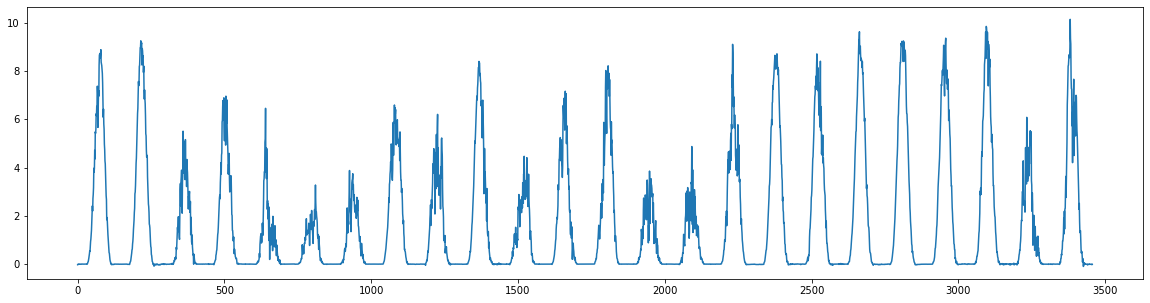

In [14]:
## 22년 6월 예측 graph
plt.figure(figsize=(20,5))
plt.plot(test_pred, label='pred')
plt.show()

## XGB

In [45]:
from xgboost import XGBRegressor

xgb_wrapper = XGBRegressor(n_estimators=3000, learning_rate=0.1, max_depth=3)
evals = [(X_val, y_val)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="rmse", 
                eval_set=evals, verbose=True)

xgb_preds = xgb_wrapper.predict(X_val)

[0]	validation_0-rmse:1.82696
[1]	validation_0-rmse:1.67679
[2]	validation_0-rmse:1.54278
[3]	validation_0-rmse:1.41819
[4]	validation_0-rmse:1.30814
[5]	validation_0-rmse:1.20943
[6]	validation_0-rmse:1.12153
[7]	validation_0-rmse:1.04565
[8]	validation_0-rmse:0.97636
[9]	validation_0-rmse:0.91293
[10]	validation_0-rmse:0.86067
[11]	validation_0-rmse:0.81039
[12]	validation_0-rmse:0.76700
[13]	validation_0-rmse:0.72910
[14]	validation_0-rmse:0.69842
[15]	validation_0-rmse:0.66967
[16]	validation_0-rmse:0.64599
[17]	validation_0-rmse:0.62556
[18]	validation_0-rmse:0.60899
[19]	validation_0-rmse:0.59205
[20]	validation_0-rmse:0.57900
[21]	validation_0-rmse:0.56743
[22]	validation_0-rmse:0.55648
[23]	validation_0-rmse:0.54598
[24]	validation_0-rmse:0.53776
[25]	validation_0-rmse:0.53143
[26]	validation_0-rmse:0.52474
[27]	validation_0-rmse:0.51936
[28]	validation_0-rmse:0.51397
[29]	validation_0-rmse:0.50924
[30]	validation_0-rmse:0.50512
[31]	validation_0-rmse:0.50247
[32]	validation_0-

[260]	validation_0-rmse:0.42813
[261]	validation_0-rmse:0.42806
[262]	validation_0-rmse:0.42801
[263]	validation_0-rmse:0.42801
[264]	validation_0-rmse:0.42797
[265]	validation_0-rmse:0.42771
[266]	validation_0-rmse:0.42767
[267]	validation_0-rmse:0.42767
[268]	validation_0-rmse:0.42750
[269]	validation_0-rmse:0.42735
[270]	validation_0-rmse:0.42723
[271]	validation_0-rmse:0.42713
[272]	validation_0-rmse:0.42698
[273]	validation_0-rmse:0.42688
[274]	validation_0-rmse:0.42684
[275]	validation_0-rmse:0.42676
[276]	validation_0-rmse:0.42666
[277]	validation_0-rmse:0.42675
[278]	validation_0-rmse:0.42665
[279]	validation_0-rmse:0.42653
[280]	validation_0-rmse:0.42649
[281]	validation_0-rmse:0.42624
[282]	validation_0-rmse:0.42615
[283]	validation_0-rmse:0.42597
[284]	validation_0-rmse:0.42587
[285]	validation_0-rmse:0.42580
[286]	validation_0-rmse:0.42561
[287]	validation_0-rmse:0.42568
[288]	validation_0-rmse:0.42553
[289]	validation_0-rmse:0.42555
[290]	validation_0-rmse:0.42553
[291]	va

[517]	validation_0-rmse:0.41194
[518]	validation_0-rmse:0.41197
[519]	validation_0-rmse:0.41190
[520]	validation_0-rmse:0.41183
[521]	validation_0-rmse:0.41179
[522]	validation_0-rmse:0.41179
[523]	validation_0-rmse:0.41172
[524]	validation_0-rmse:0.41161
[525]	validation_0-rmse:0.41160
[526]	validation_0-rmse:0.41151
[527]	validation_0-rmse:0.41137
[528]	validation_0-rmse:0.41135
[529]	validation_0-rmse:0.41137
[530]	validation_0-rmse:0.41136
[531]	validation_0-rmse:0.41135
[532]	validation_0-rmse:0.41131
[533]	validation_0-rmse:0.41132
[534]	validation_0-rmse:0.41131
[535]	validation_0-rmse:0.41132
[536]	validation_0-rmse:0.41121
[537]	validation_0-rmse:0.41112
[538]	validation_0-rmse:0.41113
[539]	validation_0-rmse:0.41095
[540]	validation_0-rmse:0.41092
[541]	validation_0-rmse:0.41098
[542]	validation_0-rmse:0.41088
[543]	validation_0-rmse:0.41091
[544]	validation_0-rmse:0.41079
[545]	validation_0-rmse:0.41072
[546]	validation_0-rmse:0.41069
[547]	validation_0-rmse:0.41074
[548]	va

[774]	validation_0-rmse:0.40510
[775]	validation_0-rmse:0.40509
[776]	validation_0-rmse:0.40509
[777]	validation_0-rmse:0.40510
[778]	validation_0-rmse:0.40509
[779]	validation_0-rmse:0.40508
[780]	validation_0-rmse:0.40507
[781]	validation_0-rmse:0.40504
[782]	validation_0-rmse:0.40500
[783]	validation_0-rmse:0.40496
[784]	validation_0-rmse:0.40497
[785]	validation_0-rmse:0.40483
[786]	validation_0-rmse:0.40482
[787]	validation_0-rmse:0.40480
[788]	validation_0-rmse:0.40480
[789]	validation_0-rmse:0.40481
[790]	validation_0-rmse:0.40479
[791]	validation_0-rmse:0.40466
[792]	validation_0-rmse:0.40469
[793]	validation_0-rmse:0.40460
[794]	validation_0-rmse:0.40455
[795]	validation_0-rmse:0.40455
[796]	validation_0-rmse:0.40453
[797]	validation_0-rmse:0.40449
[798]	validation_0-rmse:0.40446
[799]	validation_0-rmse:0.40444
[800]	validation_0-rmse:0.40439
[801]	validation_0-rmse:0.40433
[802]	validation_0-rmse:0.40438
[803]	validation_0-rmse:0.40439
[804]	validation_0-rmse:0.40437
[805]	va

[1030]	validation_0-rmse:0.40070
[1031]	validation_0-rmse:0.40070
[1032]	validation_0-rmse:0.40070
[1033]	validation_0-rmse:0.40070
[1034]	validation_0-rmse:0.40072
[1035]	validation_0-rmse:0.40068
[1036]	validation_0-rmse:0.40067
[1037]	validation_0-rmse:0.40066
[1038]	validation_0-rmse:0.40062
[1039]	validation_0-rmse:0.40058
[1040]	validation_0-rmse:0.40058
[1041]	validation_0-rmse:0.40055
[1042]	validation_0-rmse:0.40049
[1043]	validation_0-rmse:0.40050
[1044]	validation_0-rmse:0.40052
[1045]	validation_0-rmse:0.40056
[1046]	validation_0-rmse:0.40049
[1047]	validation_0-rmse:0.40049
[1048]	validation_0-rmse:0.40048
[1049]	validation_0-rmse:0.40053
[1050]	validation_0-rmse:0.40052
[1051]	validation_0-rmse:0.40051
[1052]	validation_0-rmse:0.40050
[1053]	validation_0-rmse:0.40052
[1054]	validation_0-rmse:0.40049
[1055]	validation_0-rmse:0.40048
[1056]	validation_0-rmse:0.40050
[1057]	validation_0-rmse:0.40052
[1058]	validation_0-rmse:0.40049
[1059]	validation_0-rmse:0.40049
[1060]	val

[1279]	validation_0-rmse:0.39782
[1280]	validation_0-rmse:0.39780
[1281]	validation_0-rmse:0.39773
[1282]	validation_0-rmse:0.39772
[1283]	validation_0-rmse:0.39772
[1284]	validation_0-rmse:0.39777
[1285]	validation_0-rmse:0.39776
[1286]	validation_0-rmse:0.39773
[1287]	validation_0-rmse:0.39771
[1288]	validation_0-rmse:0.39759
[1289]	validation_0-rmse:0.39765
[1290]	validation_0-rmse:0.39765
[1291]	validation_0-rmse:0.39765
[1292]	validation_0-rmse:0.39764
[1293]	validation_0-rmse:0.39761
[1294]	validation_0-rmse:0.39758
[1295]	validation_0-rmse:0.39758
[1296]	validation_0-rmse:0.39755
[1297]	validation_0-rmse:0.39755
[1298]	validation_0-rmse:0.39753
[1299]	validation_0-rmse:0.39753
[1300]	validation_0-rmse:0.39754
[1301]	validation_0-rmse:0.39752
[1302]	validation_0-rmse:0.39751
[1303]	validation_0-rmse:0.39750
[1304]	validation_0-rmse:0.39745
[1305]	validation_0-rmse:0.39744
[1306]	validation_0-rmse:0.39748
[1307]	validation_0-rmse:0.39736
[1308]	validation_0-rmse:0.39736
[1309]	val

[1528]	validation_0-rmse:0.39522
[1529]	validation_0-rmse:0.39524
[1530]	validation_0-rmse:0.39523
[1531]	validation_0-rmse:0.39525
[1532]	validation_0-rmse:0.39526
[1533]	validation_0-rmse:0.39526
[1534]	validation_0-rmse:0.39526
[1535]	validation_0-rmse:0.39526
[1536]	validation_0-rmse:0.39528
[1537]	validation_0-rmse:0.39528
[1538]	validation_0-rmse:0.39529
[1539]	validation_0-rmse:0.39528
[1540]	validation_0-rmse:0.39525
[1541]	validation_0-rmse:0.39525
[1542]	validation_0-rmse:0.39524
[1543]	validation_0-rmse:0.39526
[1544]	validation_0-rmse:0.39525
[1545]	validation_0-rmse:0.39525
[1546]	validation_0-rmse:0.39527
[1547]	validation_0-rmse:0.39527
[1548]	validation_0-rmse:0.39519
[1549]	validation_0-rmse:0.39516
[1550]	validation_0-rmse:0.39514
[1551]	validation_0-rmse:0.39502
[1552]	validation_0-rmse:0.39502
[1553]	validation_0-rmse:0.39500
[1554]	validation_0-rmse:0.39500
[1555]	validation_0-rmse:0.39500
[1556]	validation_0-rmse:0.39493
[1557]	validation_0-rmse:0.39493
[1558]	val

[1777]	validation_0-rmse:0.39348
[1778]	validation_0-rmse:0.39348
[1779]	validation_0-rmse:0.39348
[1780]	validation_0-rmse:0.39351
[1781]	validation_0-rmse:0.39351
[1782]	validation_0-rmse:0.39356
[1783]	validation_0-rmse:0.39349
[1784]	validation_0-rmse:0.39349
[1785]	validation_0-rmse:0.39350
[1786]	validation_0-rmse:0.39352
[1787]	validation_0-rmse:0.39350
[1788]	validation_0-rmse:0.39350
[1789]	validation_0-rmse:0.39351
[1790]	validation_0-rmse:0.39355
[1791]	validation_0-rmse:0.39360
[1792]	validation_0-rmse:0.39357
[1793]	validation_0-rmse:0.39356
[1794]	validation_0-rmse:0.39354
[1795]	validation_0-rmse:0.39352
[1796]	validation_0-rmse:0.39354
[1797]	validation_0-rmse:0.39355
[1798]	validation_0-rmse:0.39352
[1799]	validation_0-rmse:0.39354
[1800]	validation_0-rmse:0.39355
[1801]	validation_0-rmse:0.39356
[1802]	validation_0-rmse:0.39357
[1803]	validation_0-rmse:0.39360
[1804]	validation_0-rmse:0.39360
[1805]	validation_0-rmse:0.39365
[1806]	validation_0-rmse:0.39364
[1807]	val

In [46]:
evaluate_regr(y_val, xgb_preds)

RMSLE: 0.108, RMSE: 0.393, MAE: 0.157


In [47]:
## 22년 6월 예측
test_lgbm_pred = xgb_wrapper.predict(X_test)
test_lgbm_pred = pd.DataFrame(test_lgbm_pred)
test_lgbm_pred

,0
0,-0.0264267
1,-0.0208656
2,-0.0015743
3,0.0027903
4,0.0065235
...,...
3452,-0.0308209
3453,-0.0287203
3454,-0.0251148
3455,-0.0539864


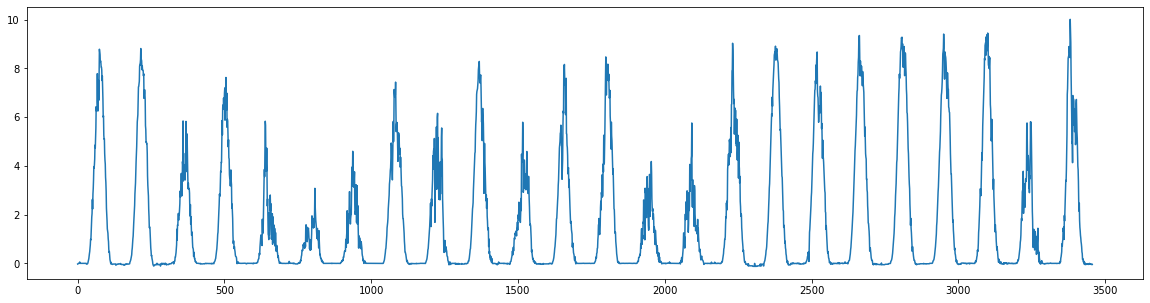

In [48]:
## 22년 6월 예측 graph
plt.figure(figsize=(20,5))
plt.plot(test_lgbm_pred, label='pred')
plt.show()

## XGB, LGBM Blending

In [49]:
pred = 0.5 * xgb_preds + 0.5 * lgbm_preds
preds = {'최종 혼합': pred,
         'XGBM': xgb_preds,
         'LGBM': lgbm_preds}

In [53]:
evaluate_regr(y_val, pred)

RMSLE: 0.099, RMSE: 0.369, MAE: 0.140


---------